https://www.youtube.com/watch?v=PlmFUQCL_ok
https://github.com/libigl/libigl-tutorial-data
https://www.karlsims.com/rd.html
https://onedrive.live.com/?cid=D593C887747D2172&id=D593C887747D2172%2126941&parId=D593C887747D2172%2126801&o=OneUp

In [1]:
import sys
import numpy as np
import meshplot as mp
import scipy.sparse as sp
import matplotlib.pyplot as plt
import pyvista as pv

from src.mesh import Mesh
from src.solver import WaveEquationCrankNicolson
from utils.animate import animate_solution_normal, vector_field

In [2]:
# Mesh path
mesh_path = './datasets/horse.obj'
# Get the mesh
mesh = Mesh()
mesh.load_from_file(mesh_path)
# Informazioni
print(f"Mesh caricata. vertici: {mesh.num_vertices}, facce: {mesh.num_faces}")

normals = mesh.get_vertex_normals(normalize=True)
vector_field(mesh, normals, scale=2e-3)

Mesh caricata. vertici: 2400, facce: 4796


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.000150…

# Wave equation

\begin{equation}
    \frac{\partial^2 u}{\partial t^2} = \alpha \Delta u
\end{equation}

In [13]:
# Time axis
times = np.linspace(0, 45, 1000)

# Initial condition
initial_disp = np.zeros(shape=(mesh.num_vertices))
#initial_disp[800] = 0.5

initial_vel = np.zeros(shape=(mesh.num_vertices))
initial_vel[800] = 0.1

# Initialize the solver
# TODO: è corretto il metodo?
solver = WaveEquationCrankNicolson(mesh, times, wave_speed=10)

# Evaluate the solution
solution = solver.solve(initial_disp, initial_vel)

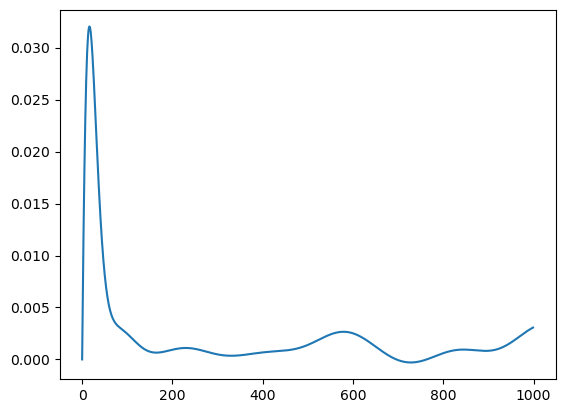

In [14]:
plt.plot(solution[:,800])

In [15]:
v = mesh.vertices
f = np.hstack((np.full((mesh.faces.shape[0], 1), 3), mesh.faces))
visual_mesh = pv.PolyData(v,f)

In [17]:
# TODO: la prima volta che stampo non mette la colormap

visual_mesh.compute_normals(point_normals=True, cell_normals=False, auto_orient_normals=True, inplace=True)
normals = visual_mesh.point_data['Normals']

points = visual_mesh.points.copy()

p = pv.Plotter(notebook=False, off_screen=True)
mesh_actor = p.add_mesh(visual_mesh, show_scalar_bar=False, cmap='viridis')

p.camera_position = (
    visual_mesh.center - np.array([0, 0, 1.5*visual_mesh.length]),
    visual_mesh.center,
    (0, 1, 0)
)

p.open_gif('wave.gif')
p.render()

for i, frame in enumerate(solution[::20]):
    displacement = normals * frame[:,np.newaxis]
    visual_mesh.points = points + displacement
    visual_mesh['scalars'] = frame
    angle = 3/4*np.pi*i/50
    p.camera_position = (
        visual_mesh.center - np.array([-np.sin(angle)*1.5*visual_mesh.length, -angle/15, np.cos(angle)*1.5*visual_mesh.length]),
        visual_mesh.center,
        (0, 1, 0)
    )
    p.render()
    p.write_frame()

visual_mesh.points = points
p.close()

In [7]:
#animate_solution_normal(solution[::5], mesh, scale=1.0, pause_time=30)